### Курсовая работа Мегафон.

#### Загрузка датасета с признаками с помощью DASK:

In [1]:
import dask.dataframe as dd
df_features = dd.read_csv('features.csv', delimiter='\t')

#### Обор датасета с признаками:

In [2]:
df_features.head()

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
0,0,2013026,1531688400,18.910029,46.980888,4.969214,-1.386798,3.791754,-14.01179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-301.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,1,2014722,1539550800,36.690029,152.400888,448.069214,563.833202,463.841754,568.99821,-16.08618,...,-891.373846,-544.770792,-20.996269,48.369552,80.252276,-13.832889,-0.694428,-1.175933,-0.45614,0.0
2,2,2015199,1545598800,-67.019971,157.050888,-63.180786,178.103202,-68.598246,156.99821,3.51382,...,-977.373846,-613.770792,-12.996269,-37.630448,10829.252276,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3,2021765,1534107600,7.010029,150.200888,-6.930786,216.213202,76.621754,351.84821,-16.08618,...,-973.373846,-613.770792,-23.996269,-37.630448,-205.747724,-24.832889,-0.694428,-11.175933,-0.45614,1.0
4,4,2027465,1533502800,-90.439971,134.220888,-104.380786,153.643202,-109.798246,132.53821,-16.08618,...,1643.626154,2007.229208,206.003731,-21.630448,6667.252276,92.167111,-0.694428,49.824067,47.54386,0.0


In [3]:
print('Размерность датасета')
t = df_features.shape
t[0].compute(), t[1]

Размерность датасета


(4512528, 256)

#### Загрузка и обзор тренировочного и тестового датасетов:

In [4]:
import pandas as pd
df_train = pd.read_csv('data_train.csv')
df_train.head()

,Unnamed: 0,id,vas_id,buy_time,target
0,0,540968,8.0,1537131600,0.0
1,1,1454121,4.0,1531688400,0.0
2,2,2458816,1.0,1534107600,0.0
3,3,3535012,5.0,1535922000,0.0
4,4,1693214,1.0,1535922000,0.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831653 entries, 0 to 831652
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  831653 non-null  int64  
 1   id          831653 non-null  int64  
 2   vas_id      831653 non-null  float64
 3   buy_time    831653 non-null  int64  
 4   target      831653 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 31.7 MB


In [6]:
df_train['vas_id'].unique()

array([8., 4., 1., 5., 2., 7., 6., 9.])

In [7]:
df_test = pd.read_csv('data_test.csv')
df_test.head()

,Unnamed: 0,id,vas_id,buy_time
0,0,3130519,2.0,1548018000
1,1,2000860,4.0,1548018000
2,2,1099444,2.0,1546808400
3,3,1343255,5.0,1547413200
4,4,1277040,2.0,1546808400


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71231 entries, 0 to 71230
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  71231 non-null  int64  
 1   id          71231 non-null  int64  
 2   vas_id      71231 non-null  float64
 3   buy_time    71231 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 2.2 MB


#### Видно, что отсутствующих значений нет, но есть столбец "Unnamed: 0", который является дублирующим индексом во всех трех датасетах. Избавляемся от него:

In [9]:
df_features = df_features.drop('Unnamed: 0', axis=1)
df_train = df_train.drop('Unnamed: 0', axis=1)
df_test = df_test.drop('Unnamed: 0', axis=1)

#### В датасетах присутствует временной ряд. Посмотрим самую старую и самую новую дату:

In [10]:
import time
from datetime import datetime

In [11]:
print(datetime.fromtimestamp(df_train['buy_time'].min()).strftime('%Y-%m-%d %H:%M:%S'))
print(datetime.fromtimestamp(df_train['buy_time'].max()).strftime('%Y-%m-%d %H:%M:%S'))

2018-07-09 00:00:00
2018-12-31 00:00:00


In [12]:
print(datetime.fromtimestamp(df_features['buy_time'].min().compute()).strftime('%Y-%m-%d %H:%M:%S'))
print(datetime.fromtimestamp(df_features['buy_time'].max().compute()).strftime('%Y-%m-%d %H:%M:%S'))

2018-07-09 00:00:00
2019-01-21 00:00:00


#### Проведем анализ признака "vas_id" тренировочного датасета, отвечающего за тип услуги:

In [13]:
df_train['vas_id'].value_counts().sort_index()

1.0    310175
2.0    249505
4.0     85756
5.0     94085
6.0     57878
7.0     15432
8.0     13350
9.0      5472
Name: vas_id, dtype: int64

In [14]:
df_train.loc[(df_train['target']==1, 'vas_id') ].value_counts().sort_index()

1.0     5664
2.0     4797
4.0    21765
5.0     1692
6.0    24704
7.0      213
8.0      347
9.0     1004
Name: vas_id, dtype: int64

In [15]:
df_train.loc[(df_train['target']==0, 'vas_id') ].value_counts().sort_index()

1.0    304511
2.0    244708
4.0     63991
5.0     92393
6.0     33174
7.0     15219
8.0     13003
9.0      4468
Name: vas_id, dtype: int64

#### Видно, что самые предлагаемые услуги - 1 и 2, но они лидируют и по отказам подключений. А самые подключаемые - 4 и 6.

#### Построим график количества предложений каждой услуги на всем временном ряду:

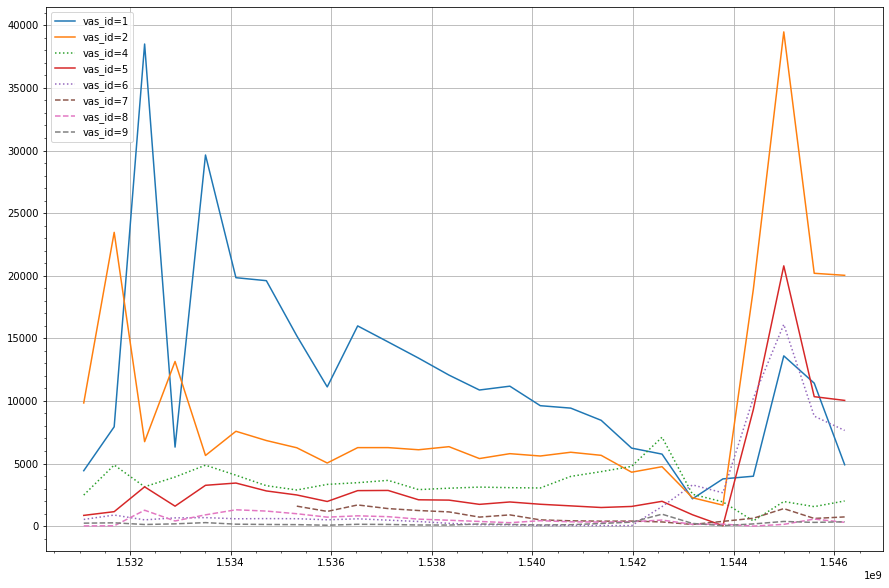

In [16]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,10))
plt.plot(df_train.loc[(df_train['vas_id']==1, 'buy_time') ].value_counts().sort_index(),label='vas_id=1')
plt.plot(df_train.loc[(df_train['vas_id']==2, 'buy_time') ].value_counts().sort_index(),label='vas_id=2')
plt.plot(df_train.loc[(df_train['vas_id']==4, 'buy_time') ].value_counts().sort_index(),':',label='vas_id=4')
plt.plot(df_train.loc[(df_train['vas_id']==5, 'buy_time') ].value_counts().sort_index(),label='vas_id=5')
plt.plot(df_train.loc[(df_train['vas_id']==6, 'buy_time') ].value_counts().sort_index(),':',label='vas_id=6')
plt.plot(df_train.loc[(df_train['vas_id']==7, 'buy_time') ].value_counts().sort_index(),'--',label='vas_id=7')
plt.plot(df_train.loc[(df_train['vas_id']==8, 'buy_time') ].value_counts().sort_index(),'--',label='vas_id=8')
plt.plot(df_train.loc[(df_train['vas_id']==9, 'buy_time') ].value_counts().sort_index(),'--',label='vas_id=9')
plt.minorticks_on()
plt.grid(which='major')
plt.legend()
plt.show()

#### Из графиков видно, что активнее всего услуги предлагают в начале временного ряда и в конце, что соответствует середине (2018-07-09) и концу (2018-12-31) 2018 года. Непопулярные к предложению услуги отмечены пунктиром. Самые подключаемые - точками.

#### Проанализируем target: 

In [17]:
df_train.loc[(df_train['target']==1, 'buy_time') ].value_counts()

1542574800    15418
1544994000     7802
1544389200     5616
1545598800     3786
1546203600     3495
1543179600     2348
1531688400     1553
1543784400     1503
1540760400     1484
1541365200     1435
1533502800     1360
1532293200     1320
1541970000     1283
1532898000     1230
1540155600     1092
1534107600     1053
1534712400      955
1539550800      932
1538946000      929
1535922000      900
1538341200      871
1537131600      864
1536526800      853
1537736400      797
1535317200      750
1531083600      557
Name: buy_time, dtype: int64

In [18]:
print(datetime.fromtimestamp(1542574800).strftime('%Y-%m-%d %H:%M:%S'))

2018-11-19 00:00:00


{'whiskers': [<matplotlib.lines.Line2D at 0x180835ca6b0>,
 'caps': [<matplotlib.lines.Line2D at 0x180835cabf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x180835ca3e0>],
 'medians': [<matplotlib.lines.Line2D at 0x180835cb0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x180835cb3a0>],
 'means': []}

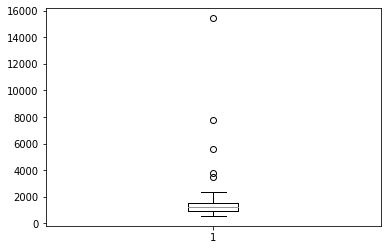

In [19]:
plt.boxplot(df_train.loc[(df_train['target']==1, 'buy_time') ].value_counts().sort_index())

#### Из вычислений и BoxPlot видно аномально высокое общее количество подключаемых услуг в дату 2018-11-19.  Даже если ошибок в данных нет, для обучения модели такие показатели можно считать выбросом.

#### Для обучения модели необходимо соединить датасеты. Но сначала необходимо проверить на соответствие колонку ID:

In [20]:
df_train['id'].nunique()

806613

In [21]:
df_features['id'].nunique().compute()

4362739

#### Как мы видим, в тренировочном датасете уникальных пользователей существенно меньше, чем в датасете с признаками. Эти лишние пользователи никак нам не помогут при обучении, поэтому приводим данные в соответствие друг с другом, в том числе и по дате, и соединяем датасеты: 

#### Преобразование тренировочного датасета и запись в файл:

In [22]:
df_train_id = df_train['id'].unique()
df_features = df_features.compute()
df_features = df_features.loc[(df_features['id'].isin(df_train_id))]

In [23]:
df_train = df_train.sort_index()
df_train = df_train.sort_values(by="buy_time")
df_features = df_features.sort_values(by="buy_time")

In [24]:
df_train_full = pd.merge_asof(df_train, df_features, on='buy_time', by='id')

In [25]:
df_train_full.to_csv('df_train_full.csv', index=False)

#### Преобразование датасета для предсказаний и запись в файл:

In [26]:
df_features = dd.read_csv('features.csv', delimiter='\t')

In [27]:
df_test_id = df_test['id'].unique()
df_features = df_features.compute()
df_features = df_features.loc[(df_features['id'].isin(df_test_id))]

In [28]:
df_test = df_test.sort_index()
df_test = df_test.sort_values(by="buy_time")
df_features = df_features.sort_values(by="buy_time")

In [29]:
df_test_full = pd.merge_asof(df_test, df_features, on='buy_time', by='id')

In [30]:
df_test_full = df_test_full.drop('Unnamed: 0', axis=1)

In [31]:
df_test_full.to_csv('df_test_full.csv', index=False)

### Загрузка подготовленных данных:

In [32]:
import pandas as pd
import catboost as catb
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

df_train_full = pd.read_csv('df_train_full.csv')

#### Разделение данных:

In [33]:
X = df_train_full.drop('target', axis=1)
y = df_train_full['target']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [35]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

#### Обучение модели:

In [46]:
model_catb = catb.CatBoostClassifier(silent = True, 
                                     loss_function='Logloss',
                                     eval_metric='Accuracy',
                                     auto_class_weights=None,
                                     random_state=42)

In [47]:
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97    516922
         1.0       0.80      0.40      0.54     40285

    accuracy                           0.95    557207
   macro avg       0.88      0.70      0.76    557207
weighted avg       0.94      0.95      0.94    557207

TEST

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    254545
         1.0       0.64      0.30      0.41     19901

    accuracy                           0.94    274446
   macro avg       0.79      0.64      0.69    274446
weighted avg       0.92      0.94      0.93    274446

CONFUSION MATRIX

col_0      0.0   1.0
target              
0.0     251140  3405
1.0      13933  5968


#### Запись модели в файл:

In [48]:
import pickle

pickle.dump(model_catb, open('megafon_catb_model.pickle', 'wb'))

#### Загрузка подготовленных данных для предсказания:

In [49]:
df_test = pd.read_csv('df_test_full.csv')

#### Загрузка модели:

In [50]:
loaded_model = pickle.load(open('megafon_catb_model.pickle', 'rb'))

#### Предсказание и запись результатов в датасет:

In [51]:
predictions = loaded_model.predict(df_test)

In [52]:
final_predictions_file = pd.read_csv('data_test.csv')
final_predictions_file = final_predictions_file.drop('Unnamed: 0', axis=1)
final_predictions_file['target'] = predictions
final_predictions_file.to_csv('answers_test.csv', index=False)